# Data Analysis

Load Data

In [761]:
import os
import pandas as pd
import numpy as np

os.chdir('/Users/janlinzner/Projects/Master-Thesis-Spatial-Proximity-Venture-Capital')

In [762]:
data = pd.read_csv('data/sets-for-r/companies_seed.csv')

Select Variables

In [763]:
selected_vars = [
    "Company ID",
    "Organization Name", "Founded Year",
"2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022",
    "Austria", "Belgium", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Norway", "Poland", "Portugal", "Slovakia (Slovak Republic)", "Spain", "Switzerland", "The Netherlands", "United Kingdom",
    "Success",
    "Exit Binary",
    "Funding Success",
    "Years to Exit",
    "Number of Founders",
    "Hub Binary",
    "Distance to Hub",
    "B2B Binary",
    "Startups Within 50km",
    "VCs Within 50km",
    "Share Successful Startups in Environment",
    "Top University Count",
    "Top University Ecosystem Binary", 
    "Number Seed Rounds",
    "Avg Seed Investor Distance",
    "Avg Seed Investor Pairwise Distance",
    "Average Seed Investors Portfolio Organizations",
    "Number Seed Investors",
    "Regional Seed Investor Binary",
    "Overregional Seed Investor Binary",
    "Avg Age of Seed Investors",
    "Avg Exits of Seed Investors",
    "Specific VC in Seed Binary",
    "Target VC in Seed Binary",
    "Hub VC in Seed Binary",
    "Accelerator Funding Binary",
    "Angel Group Funding Binary",
    "Micro VC Funding Binary",
    "Corporate Venture Capital Funding Binary",
    "Homecountry Investor in Seed Binary",
    "Seed Investor Same City",
    "Years to Seed",
    "Total Seed Funding (M)",
    "Energy",
    "Materials",
    "Industrials",
    "Consumer Discretionary",
    "Consumer Staples",
    "Health Care",
    "Financials",
    "Information Technology",
    "Communication Services",
    "Utilities",
    "Real Estate",
    "Other"
]

data = data[selected_vars]

Look for missing values

In [764]:
missing_values_analysis = data.isnull().sum().reset_index()
missing_values_analysis.columns = ['Variable', 'Missing Values']
missing_values_analysis['Non-Missing Values'] = data.shape[0] - missing_values_analysis['Missing Values']
missing_values_analysis.sort_values(by='Missing Values', ascending=False, inplace=True)


In [765]:
missing_values_analysis

,Variable,Missing Values,Non-Missing Values
44,Years to Exit,15131,1872
45,Number of Founders,3022,13981
54,Number Seed Rounds,0,17003
62,Avg Exits of Seed Investors,0,17003
61,Avg Age of Seed Investors,0,17003
...,...,...,...
27,Greece,0,17003
26,Germany,0,17003
25,France,0,17003
24,Finland,0,17003


All Seed Funding with 0, replace it with the mean

In [766]:

country_columns = [
    "Austria", "Belgium", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Hungary",
    "Ireland", "Italy", "Norway", "Poland", "Portugal", "Spain", "Switzerland", "The Netherlands", "United Kingdom"
]

for country in country_columns:
    country_mean = data.loc[(data[country] == 1) & (data['Total Seed Funding (M)'] > 0), 'Total Seed Funding (M)'].mean()
    data.loc[(data[country] == 1) & (data['Total Seed Funding (M)'] == 0), 'Total Seed Funding (M)'] = country_mean

Set a minimum of companies per country (min. 200 countries)

In [767]:
countries = [
    "Austria", "Belgium", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Norway", "Poland", "Portugal", "Slovakia (Slovak Republic)", "Spain",
    "Switzerland", "The Netherlands", "United Kingdom"
]


country_counts = data[countries].sum().reset_index()
country_counts.columns = ['Country', 'Number of Companies']

print(country_counts)

                       Country  Number of Companies
0                      Austria                  244
1                      Belgium                  295
2               Czech Republic                  224
3                      Denmark                  474
4                      Estonia                  274
5                      Finland                  499
6                       France                 1747
7                      Germany                 2609
8                       Greece                   84
9                      Hungary                  373
10                     Ireland                  350
11                       Italy                  682
12                      Latvia                  102
13                   Lithuania                  132
14                      Norway                  210
15                      Poland                  571
16                    Portugal                  288
17  Slovakia (Slovak Republic)                   69
18          

Adjust data set according to missing values

In [768]:
valid_countries = country_counts[country_counts['Number of Companies'] >= 200]['Country'].tolist()

data = data[data[valid_countries].any(axis=1)]

In [769]:
columns_to_drop = [col for col in countries if col not in valid_countries]
data = data.drop(columns=columns_to_drop)

In [770]:
data

,Company ID,Organization Name,Founded Year,2007,2008,2009,2010,2011,2012,2013,...,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate,Other
0,948,Safetica Technologies,2007,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,9531,Process Relations,2007,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,9532,livedome GmbH,2007,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,16735,Quick TV,2007,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,11268,Imperative Energy,2007,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16998,3580,Cermos,2022,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16999,18547,Expertly,2022,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
17000,18550,Combat IQ,2022,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False
17001,9699,Empion,2022,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


Drop all rows with missing founder values

In [771]:
data = data.dropna(subset=['Number of Founders'])

Show variable types

In [772]:
types = data.dtypes

In [773]:
types

Company ID                 int64
Organization Name         object
Founded Year               int64
2007                        bool
2008                        bool
                           ...  
Information Technology      bool
Communication Services      bool
Utilities                   bool
Real Estate                 bool
Other                       bool
Length: 82, dtype: object

Data changes

In [774]:
data['Hub Binary'] = data['Hub Binary'].astype(bool)

/var/folders/n8/ynbdx9r10lv6l8yh1m_hmbsh0000gn/T/ipykernel_31681/1454211762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hub Binary'] = data['Hub Binary'].astype(bool)


Detect outlier

In [775]:
outlier_analysis = {}
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']: 
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_analysis[column] = len(outliers)

outlier_summary = pd.DataFrame(list(outlier_analysis.items()), columns=['Column', 'Outlier Count'])
outlier_summary['Total Rows'] = data.shape[0]
outlier_summary['Outlier Percentage'] = (outlier_summary['Outlier Count'] / data.shape[0]) * 100
outlier_summary.sort_values(by='Outlier Count', ascending=False, inplace=True)

outlier_summary

,Column,Outlier Count,Total Rows,Outlier Percentage
6,VCs Within 50km,3134,13666,22.932826
11,Avg Seed Investor Pairwise Distance,2601,13666,19.032636
10,Avg Seed Investor Distance,1758,13666,12.864042
13,Number Seed Investors,1748,13666,12.790868
5,Startups Within 50km,1712,13666,12.527440
15,Avg Exits of Seed Investors,1494,13666,10.932241
12,Average Seed Investors Portfolio Organizations,1169,13666,8.554076
17,Total Seed Funding (M),678,13666,4.961218
14,Avg Age of Seed Investors,669,13666,4.895361
16,Years to Seed,531,13666,3.885555


In [776]:
features_with_outliers = outlier_summary[outlier_summary['Outlier Count'] > 0]['Column'].tolist()


for var in features_with_outliers:
    if var in data.columns:
        data[var] = data[var].apply(lambda x: np.log(x + 1) if x > 0 else 0)

/var/folders/n8/ynbdx9r10lv6l8yh1m_hmbsh0000gn/T/ipykernel_31681/2775699860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var] = data[var].apply(lambda x: np.log(x + 1) if x > 0 else 0)


In [777]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
iqr_bounds = {
    column: {
        'lower': data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)),
        'upper': data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    }
    for column in numeric_cols
}

outlier_flags = data.apply(
    lambda row: any((row[column] < iqr_bounds[column]['lower']) | (row[column] > iqr_bounds[column]['upper'])
                    for column in numeric_cols),
    axis=1
)

data['Outlier Flag'] = outlier_flags

/var/folders/n8/ynbdx9r10lv6l8yh1m_hmbsh0000gn/T/ipykernel_31681/4166915889.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier Flag'] = outlier_flags


In [778]:
outlier_analysis = {}
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']: 
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_analysis[column] = len(outliers)

outlier_summary = pd.DataFrame(list(outlier_analysis.items()), columns=['Column', 'Outlier Count'])
outlier_summary['Total Rows'] = data.shape[0]
outlier_summary['Outlier Percentage'] = (outlier_summary['Outlier Count'] / data.shape[0]) * 100
outlier_summary.sort_values(by='Outlier Count', ascending=False, inplace=True)

outlier_summary

,Column,Outlier Count,Total Rows,Outlier Percentage
2,Years to Exit,1717,13666,12.564028
13,Number Seed Investors,947,13666,6.929606
12,Average Seed Investors Portfolio Organizations,457,13666,3.344066
15,Avg Exits of Seed Investors,186,13666,1.361042
17,Total Seed Funding (M),177,13666,1.295185
7,Share Successful Startups in Environment,143,13666,1.046393
14,Avg Age of Seed Investors,94,13666,0.687838
9,Number Seed Rounds,78,13666,0.570760
16,Years to Seed,3,13666,0.021952
3,Number of Founders,2,13666,0.014635


Drop the remaining outliers

In [779]:
data = data[~data['Outlier Flag']]

In [780]:
data

,Company ID,Organization Name,Founded Year,2007,2008,2009,2010,2011,2012,2013,...,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate,Other,Outlier Flag
0,948,Safetica Technologies,2007,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,16735,Quick TV,2007,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,11268,Imperative Energy,2007,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,9243,HAPILA GmbH,2007,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,6541,Minube,2007,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978,314,Nourica,2022,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16983,9665,heycare (former heynanny),2022,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
16988,3603,Swave Photonics,2022,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
16990,21415,reconfigured,2022,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


Drop one-hot categories to prevent inf vif values

In [781]:
# data = data.drop(columns=['2007'], errors='ignore')  
# data = data.drop(columns=['Germany'], errors='ignore')  

Correlation Analysis

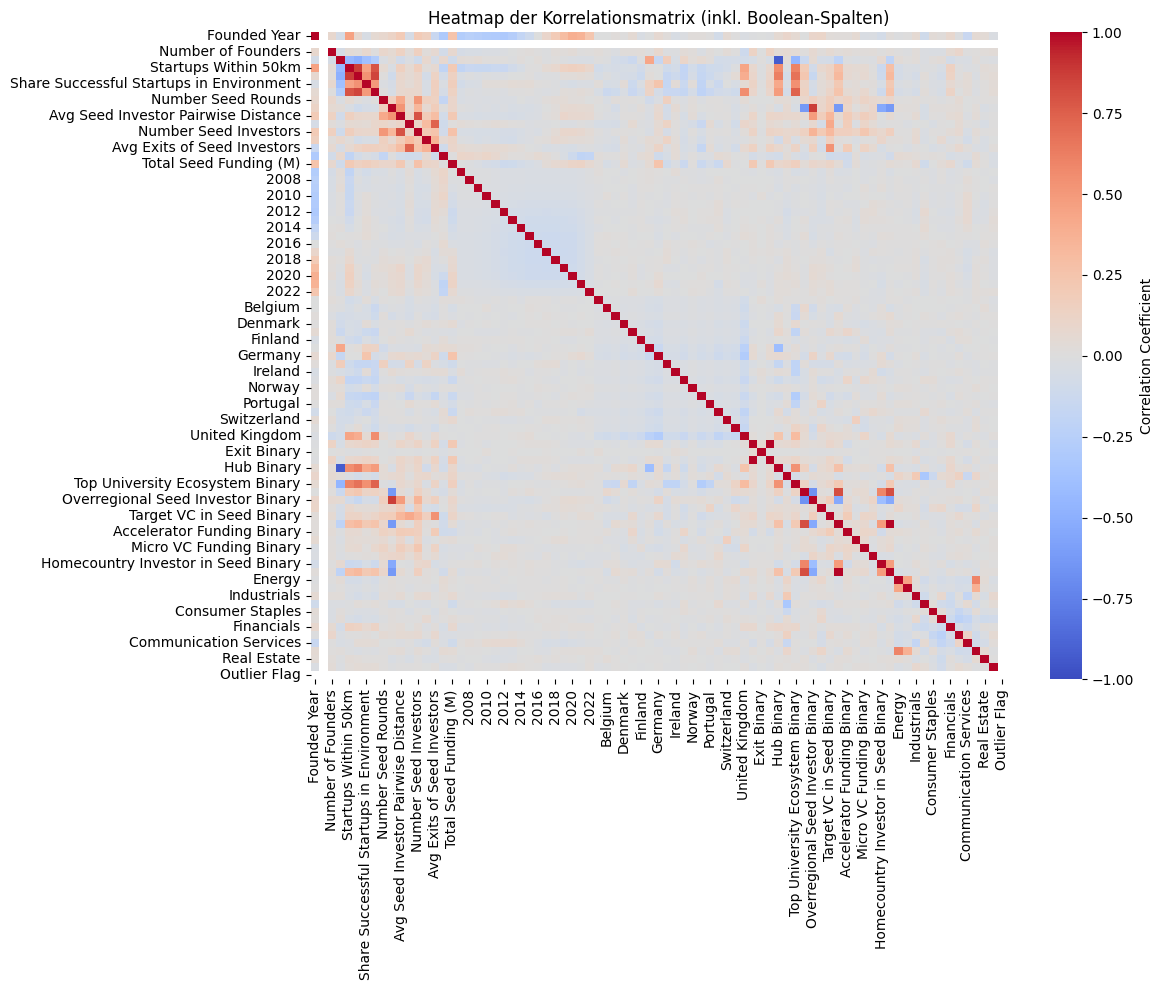

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1a. Wähle numerische Spalten (ohne ID-Spalten)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Entferne Identifier-Spalten falls nötig:
drop_cols = ["Company ID", "ID", "Index"]  # passe an deine Namen an
numeric_cols = [c for c in numeric_cols if c not in drop_cols]

# 1b. Wähle boolesche Spalten
bool_cols = data.select_dtypes(include=['bool']).columns.tolist()

# --- 2. Konvertiere Boolesche Spalten in 0/1 und kombiniere ---
if bool_cols:
    df_bool = data[bool_cols].astype(int)
else:
    df_bool = pd.DataFrame(index=data.index)

df_num = data[numeric_cols].copy()
df_design = pd.concat([df_num, df_bool], axis=1)

# --- 3. Fehlende Werte behandeln für Korrelation/VIF ---
# Zeilen mit NA entfernen, da VIF sonst nicht berechnet werden kann
df_design_clean = df_design.dropna()

# --- 4. Korrelationsmatrix & Heatmap ---
corr_matrix = df_design_clean.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot=False,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Heatmap der Korrelationsmatrix (inkl. Boolean-Spalten)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 5. VIF-Berechnung ---
vif_values = []
for i in range(df_design_clean.shape[1]):
    try:
        vif = variance_inflation_factor(df_design_clean.values, i)
    except Exception as e:
        vif = np.nan
    vif_values.append(vif)

vif_data = pd.DataFrame({
    'variable': df_design_clean.columns,
    'VIF': vif_values
})



In [783]:
vif_data

,variable,VIF
0,Founded Year,inf
1,Years to Exit,NaN
2,Number of Founders,1.091526
3,Distance to Hub,15.729496
4,Startups Within 50km,22.638625
...,...,...
76,Communication Services,1.176621
77,Utilities,1.646668
78,Real Estate,1.041765
79,Other,1.034883


Drop cols

In [784]:
drop_cols = ["Funding Success", "Years to Exit", "Exit Binary", "Distance to Hub", "Outlier Flag", "VCs Within 50km", "Startups Within 50km", "Seed Investor Same City", "Average Seed Investors Portfolio Organizations",  "Top University Count", "Overregional Seed Investor Binary", "Regional Seed Investor Binary", "Homecountry Investor in Seed Binary",  "Avg Seed Investor Pairwise Distance", "Share Successful Startups in Environment", "Number Seed Investors", "Number Seed Rounds"]

In [785]:
data = data.drop(columns=drop_cols)

New Calc of Vif values

In [786]:
df_design_clean_dropped = df_design_clean.drop(columns=drop_cols, errors='ignore')

vif_values_dropped = []
for i in range(df_design_clean_dropped.shape[1]):
    try:
        vif = variance_inflation_factor(df_design_clean_dropped.values, i)
    except Exception as e:
        vif = np.nan
    vif_values_dropped.append(vif)

vif_data_dropped = pd.DataFrame({
    'variable': df_design_clean_dropped.columns,
    'VIF': vif_values_dropped
})

vif_data_dropped

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,Founded Year,inf
1,Number of Founders,1.081661
2,Avg Seed Investor Distance,2.063342
3,Avg Age of Seed Investors,1.368882
4,Avg Exits of Seed Investors,2.007107
...,...,...
59,Information Technology,1.182687
60,Communication Services,1.172953
61,Utilities,1.643286
62,Real Estate,1.039679


In [787]:
data.to_csv('data/sets-for-r/regression-data.csv', index=False)

Regressions

In [788]:
cols_to_int = ["Avg Seed Investor Distance", 'Number of Founders', 'B2B Binary', 'Hub Binary', 'Top University Ecosystem Binary', 'Years to Seed', 'Specific VC in Seed Binary', 'Hub VC in Seed Binary','Target VC in Seed Binary', 'Accelerator Funding Binary', 'Angel Group Funding Binary', 'Micro VC Funding Binary', 'Corporate Venture Capital Funding Binary']

data = data.astype({ col: int for col in cols_to_int })

In [789]:
import statsmodels.api as sm

dependent_var = 'Success'  
included_vars = ['Avg Seed Investor Distance']

In [790]:
from imblearn.over_sampling import SMOTE

X = data[included_vars]
y = data[dependent_var]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

Success
False    9338
True     9338
Name: count, dtype: int64


In [791]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from sklearn.metrics import (
    confusion_matrix, accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    log_loss, brier_score_loss, matthews_corrcoef
)

# 1. Fit your logit (you already have this)
X_with_const = sm.add_constant(X_resampled)
logit_model  = sm.Logit(y_resampled, X_with_const).fit(disp=False)

# 2. Compute all the metrics you want
probs = logit_model.predict(X_with_const)
preds = probs > 0.5

tn, fp, fn, tp = confusion_matrix(y_resampled, preds).ravel()
metrics = {
    "Accuracy":              accuracy_score(y_resampled, preds),
    "Precision":             precision_score(y_resampled, preds),
    "Recall":                recall_score(y_resampled, preds),
    "F1 Score":              f1_score(y_resampled, preds),
    "ROC AUC":               roc_auc_score(y_resampled, probs),
    "False Neg Rate (FNR)":  fn / (fn + tp)
}

# 3. Build your Stargazer table
stargazer = Stargazer([logit_model])
stargazer.title("Logistic Regression: Determinants of Success")
stargazer.dependent_variable_name("Success (binary)")
stargazer.custom_columns(["Logit"], [1])
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.covariate_order([
    "const",
    "Avg Seed Investor Distance"
])

# 4. Add each metric as a new row
for name, val in metrics.items():
    stargazer.add_line(name, [f"{val:.3f}"])

stargazer

Add another regression model

In [792]:

data["Founding Year (centered)"] = data["Founded Year"] - data["Founded Year"].mean()

In [793]:
included_vars_new = [ 'Number of Founders', 'B2B Binary', 'Hub Binary', 'Top University Ecosystem Binary', 'Founding Year (centered)']
X_new = data[included_vars_new]
y_new = data[dependent_var]

smote = SMOTE(random_state=42)
X_resampled_new, y_resampled_new = smote.fit_resample(X_new, y_new)

X_new_with_const = sm.add_constant(X_resampled_new)
logit_model_new = sm.Logit(y_resampled_new, X_new_with_const).fit(disp=False)

# Add both models to Stargazer
stargazer = Stargazer([logit_model, logit_model_new])
stargazer.title("Logistic Regression: Determinants of Success")
stargazer.dependent_variable_name("Success (binary)")
stargazer.custom_columns(["Model 1", "Model 2"], [1, 1])
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)

# Render the Stargazer output
stargazer

In [794]:
included_vars_new_2 = ["Avg Seed Investor Distance", 'Number of Founders', 'B2B Binary', 'Hub Binary', "Founding Year (centered)", 'Top University Ecosystem Binary', 'Years to Seed', 'Specific VC in Seed Binary', 'Hub VC in Seed Binary','Target VC in Seed Binary', 'Accelerator Funding Binary', 'Angel Group Funding Binary', 'Micro VC Funding Binary', 'Corporate Venture Capital Funding Binary', 'Total Seed Funding (M)']
X_new_2 = data[included_vars_new_2]
y_new_2 = data[dependent_var]

smote = SMOTE(random_state=42)
X_resampled_new_2, y_resampled_new_2 = smote.fit_resample(X_new_2, y_new_2)

X_new_with_const_2 = sm.add_constant(X_resampled_new_2)
logit_model_new_2 = sm.Logit(y_resampled_new_2, X_new_with_const_2).fit(disp=False)


# Add both models to Stargazer
stargazer = Stargazer([logit_model, logit_model_new, logit_model_new_2])
stargazer.title("Logistic Regression: Determinants of Success")
stargazer.dependent_variable_name("Success (binary)")
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.covariate_order([
    "Avg Seed Investor Distance",  
    "B2B Binary",
    "Hub Binary",
    "Founding Year (centered)",
    "Number of Founders",
    "Top University Ecosystem Binary",
    "Accelerator Funding Binary",
    "Angel Group Funding Binary",
    "Corporate Venture Capital Funding Binary",
    "Hub VC in Seed Binary",
    "Micro VC Funding Binary",
    "Specific VC in Seed Binary",
    "Target VC in Seed Binary",
    "Years to Seed",
    'Total Seed Funding (M)',
    "const"
], restrict=False)

# Render the Stargazer output
stargazer

In [795]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Prepare lists of (model, X, y) for each of your three specs
model_specs = [
    (logit_model,       X_with_const,         y_resampled),
    (logit_model_new,   X_new_with_const,     y_resampled_new),
    (logit_model_new_2, X_new_with_const_2,   y_resampled_new_2),
]

# 2. Compute predictions and metrics for each
accs, precs, recs, f1s, aucs = [], [], [], [], []
for m, Xmat, ytrue in model_specs:
    probs = m.predict(Xmat)
    preds = probs > 0.5

    accs.append(accuracy_score(ytrue, preds))
    precs.append(precision_score(ytrue, preds))
    recs.append(recall_score(ytrue, preds))
    f1s .append(f1_score(ytrue, preds))
    aucs.append(roc_auc_score(ytrue, probs))

# 3. Add them to your Stargazer table
stargazer.add_line("Accuracy",        [f"{x:.3f}" for x in accs])
stargazer.add_line("Precision",       [f"{x:.3f}" for x in precs])
stargazer.add_line("Recall",          [f"{x:.3f}" for x in recs])
stargazer.add_line("F1 Score",        [f"{x:.3f}" for x in f1s])
stargazer.add_line("ROC AUC",         [f"{x:.3f}" for x in aucs])

# 4. Render as before
from IPython.core.display import HTML
HTML(stargazer.render_html())